# Import libraries

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

# Dataset Preparation

In [ ]:
train_zip = "/content/drive/MyDrive/train.zip"
with ZipFile(train_zip, 'r') as zip_: 
    zip_.extractall('/content/kaggle/working')

train_mask_zip = "/content/drive/MyDrive/train_masks.zip"
with ZipFile(train_mask_zip, 'r') as zip_: 
    zip_.extractall('/content/kaggle/working')

In [ ]:
print("Train set:  ", len(os.listdir("/content/kaggle/working/train")))
print("Train masks:", len(os.listdir("/content/kaggle/working/train_masks")))

Train set:   5088
Train masks: 5088


In [ ]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/content/kaggle/working/train'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id)

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

,car_path
id,
cafee4122080_08,/content/kaggle/working/train/cafee4122080_08.jpg
e1d2c25f3510_01,/content/kaggle/working/train/e1d2c25f3510_01.jpg
292f59c6a347_05,/content/kaggle/working/train/292f59c6a347_05.jpg
424658d9f222_15,/content/kaggle/working/train/424658d9f222_15.jpg
6f6dced498c4_12,/content/kaggle/working/train/6f6dced498c4_12.jpg
...,...
9c2e82c23803_06,/content/kaggle/working/train/9c2e82c23803_06.jpg
4a4364d7fc6d_02,/content/kaggle/working/train/4a4364d7fc6d_02.jpg
dd70a0a51e3b_06,/content/kaggle/working/train/dd70a0a51e3b_06.jpg


In [ ]:
car_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/content/kaggle/working/train_masks'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        car_id = filename.split(".")[0]
        car_id = car_id.split("_mask")[0]
        car_ids.append(car_id)

        
d = {"id": car_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

,mask_path
id,
b44091aa62e4_13,/content/kaggle/working/train_masks/b44091aa62...
351c583eabd6_14,/content/kaggle/working/train_masks/351c583eab...
d61b6bfeabb2_16,/content/kaggle/working/train_masks/d61b6bfeab...
26ccab021981_09,/content/kaggle/working/train_masks/26ccab0219...
791c1a9775be_07,/content/kaggle/working/train_masks/791c1a9775...
...,...
6cc98271f4dd_05,/content/kaggle/working/train_masks/6cc98271f4...
db09fec614d2_03,/content/kaggle/working/train_masks/db09fec614...
a3e2e104d58a_13,/content/kaggle/working/train_masks/a3e2e104d5...


In [ ]:
df["mask_path"] = mask_df["mask_path"]
df

,car_path,mask_path
id,,
cafee4122080_08,/content/kaggle/working/train/cafee4122080_08.jpg,/content/kaggle/working/train_masks/cafee41220...
e1d2c25f3510_01,/content/kaggle/working/train/e1d2c25f3510_01.jpg,/content/kaggle/working/train_masks/e1d2c25f35...
292f59c6a347_05,/content/kaggle/working/train/292f59c6a347_05.jpg,/content/kaggle/working/train_masks/292f59c6a3...
424658d9f222_15,/content/kaggle/working/train/424658d9f222_15.jpg,/content/kaggle/working/train_masks/424658d9f2...
6f6dced498c4_12,/content/kaggle/working/train/6f6dced498c4_12.jpg,/content/kaggle/working/train_masks/6f6dced498...
...,...,...
9c2e82c23803_06,/content/kaggle/working/train/9c2e82c23803_06.jpg,/content/kaggle/working/train_masks/9c2e82c238...
4a4364d7fc6d_02,/content/kaggle/working/train/4a4364d7fc6d_02.jpg,/content/kaggle/working/train_masks/4a4364d7fc...
dd70a0a51e3b_06,/content/kaggle/working/train/dd70a0a51e3b_06.jpg,/content/kaggle/working/train_masks/dd70a0a51e...


In [ ]:
img_size = [256,256]

def data_augmentation(car_img, mask_img):

    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(car_path, mask_path):
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    
    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

In [ ]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

In [ ]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [ ]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)

In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

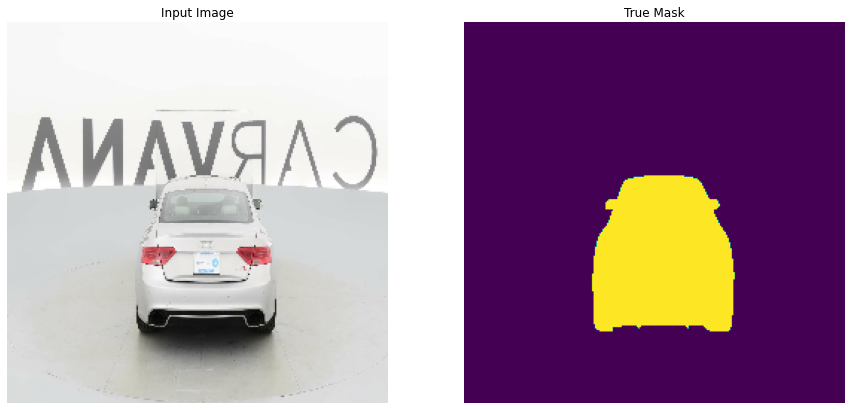

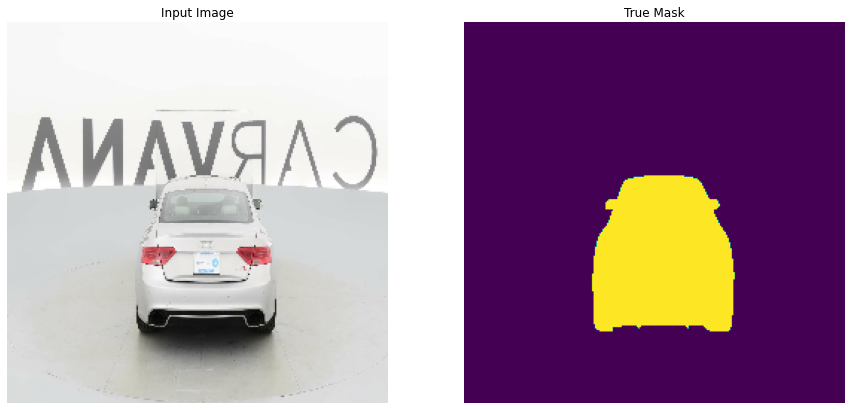

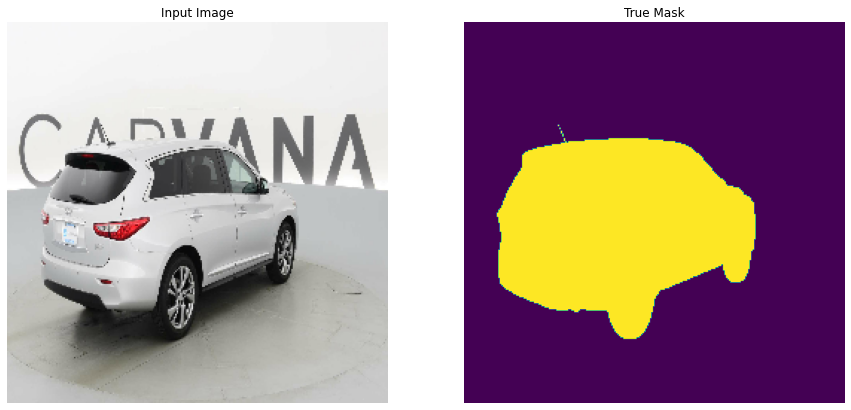

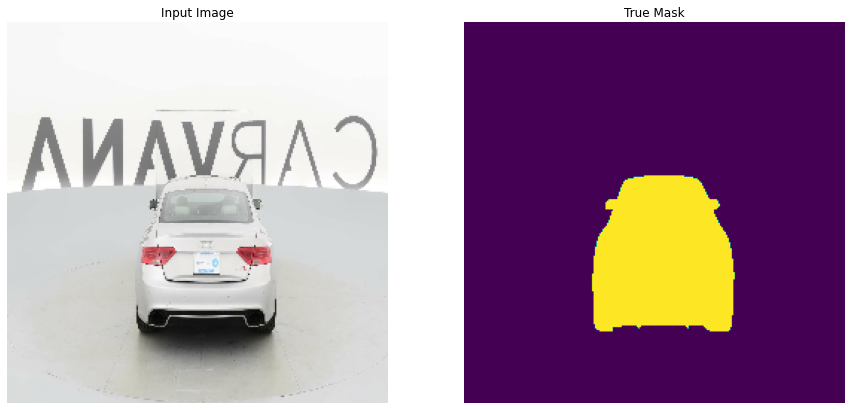

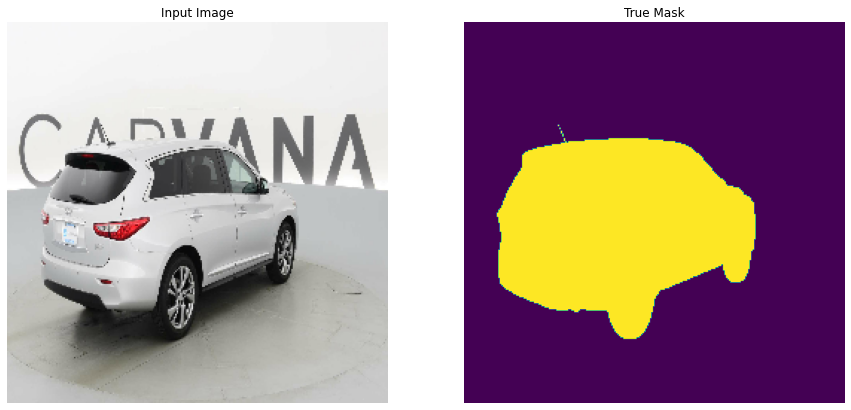

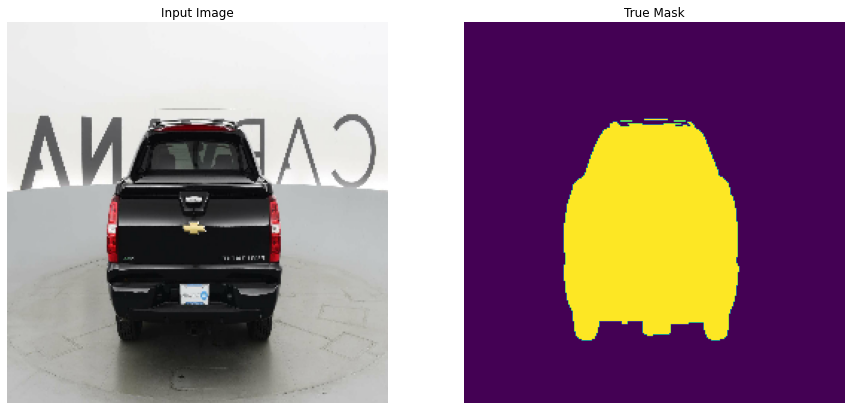

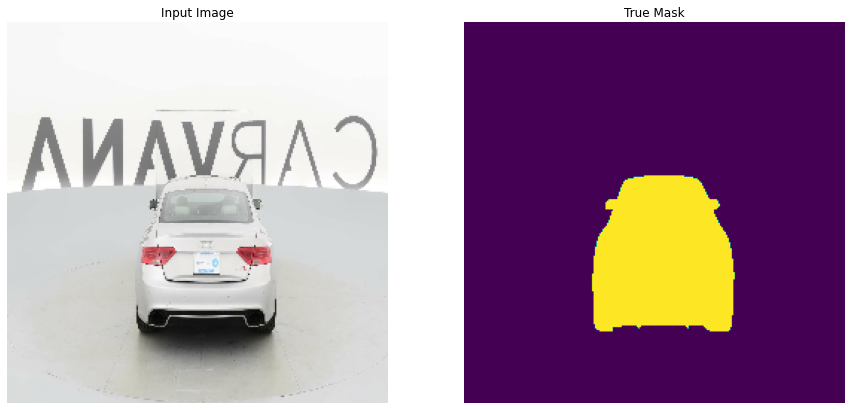

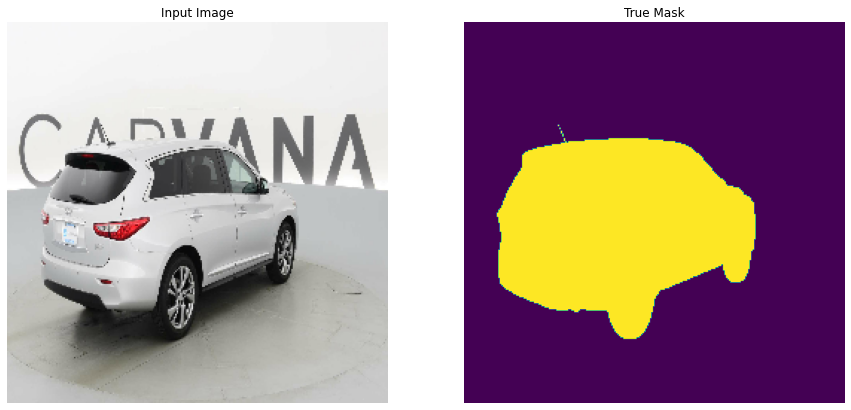

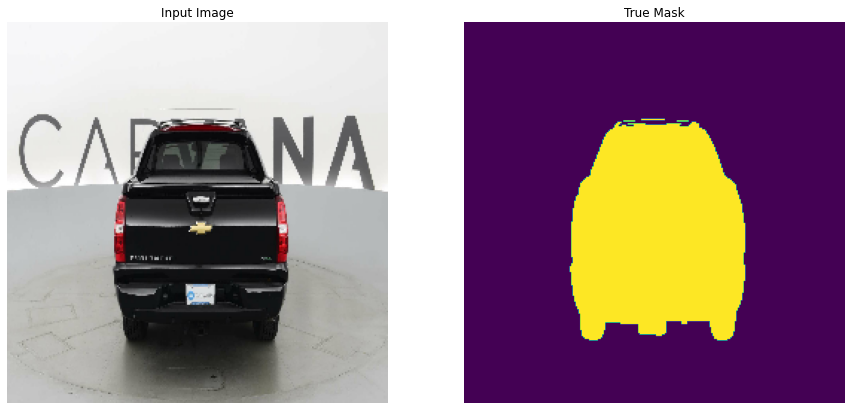

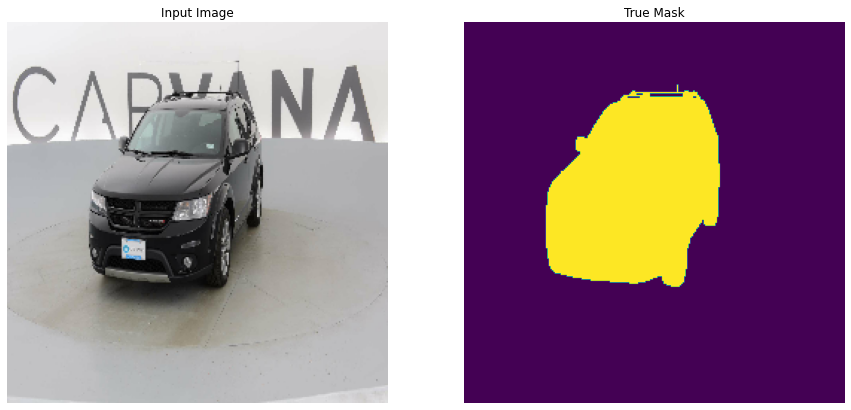

In [ ]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

# UNet Model

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

# Training the UNet Model

In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

# tf.keras.utils.plot_model(model, show_shapes=True)

1/1 [==============================] - 9s 9s/step


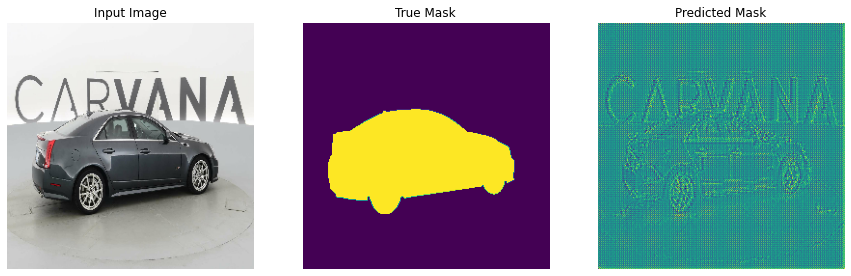

In [ ]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

Epoch 1/18
1/1 [==============================] - 0s 20ms/step


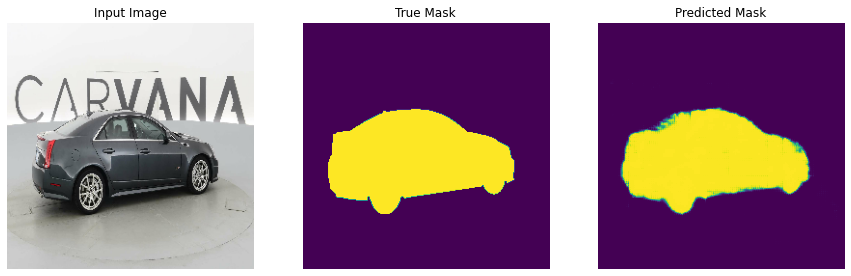

Epoch 2/18
238/238 [==============================] - 53s 222ms/step - loss: 0.0243 - dice_coef: 0.9757 - binary_accuracy: 0.9913 - val_loss: 0.0238 - val_dice_coef: 0.9763 - val_binary_accuracy: 0.9913
Epoch 3/18
1/1 [==============================] - 0s 21ms/step


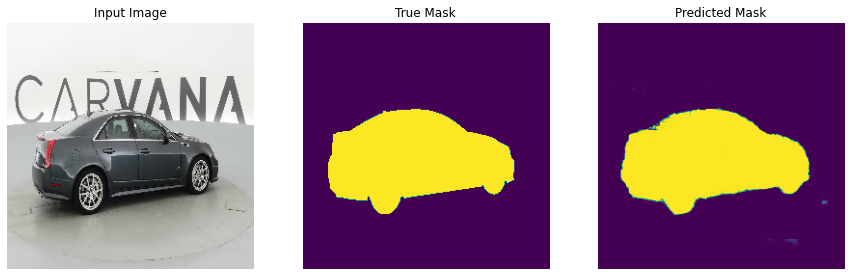

Epoch 4/18
238/238 [==============================] - 53s 224ms/step - loss: 0.0203 - dice_coef: 0.9797 - binary_accuracy: 0.9922 - val_loss: 0.0205 - val_dice_coef: 0.9795 - val_binary_accuracy: 0.9919
Epoch 5/18
1/1 [==============================] - 0s 21ms/step


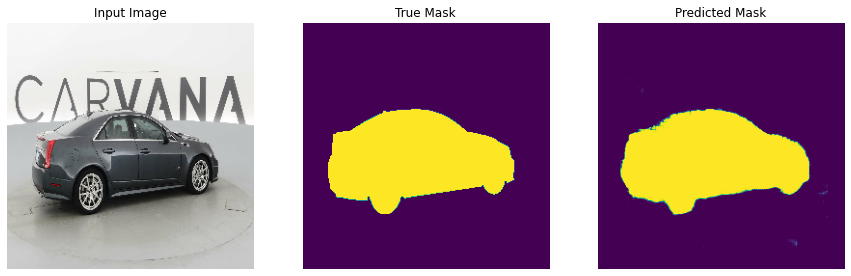

Epoch 6/18
238/238 [==============================] - 53s 223ms/step - loss: 0.0188 - dice_coef: 0.9812 - binary_accuracy: 0.9925 - val_loss: 0.0199 - val_dice_coef: 0.9801 - val_binary_accuracy: 0.9920
Epoch 7/18
1/1 [==============================] - 0s 24ms/step


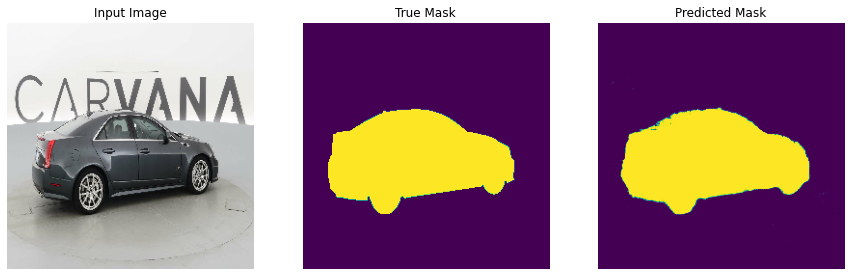

Epoch 8/18
238/238 [==============================] - 53s 224ms/step - loss: 0.0181 - dice_coef: 0.9819 - binary_accuracy: 0.9927 - val_loss: 0.0185 - val_dice_coef: 0.9815 - val_binary_accuracy: 0.9925
Epoch 9/18
1/1 [==============================] - 0s 21ms/step


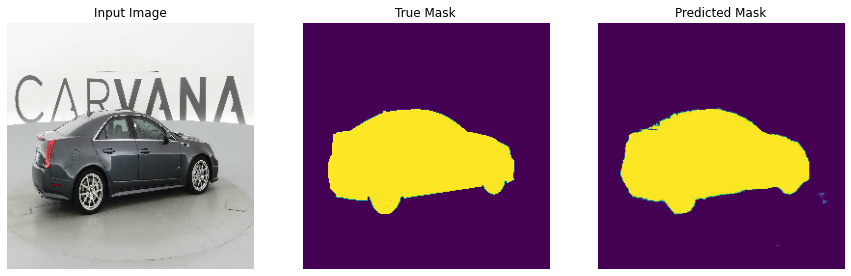

Epoch 10/18
238/238 [==============================] - 53s 224ms/step - loss: 0.0175 - dice_coef: 0.9825 - binary_accuracy: 0.9929 - val_loss: 0.0182 - val_dice_coef: 0.9819 - val_binary_accuracy: 0.9926
Epoch 11/18
1/1 [==============================] - 0s 20ms/step


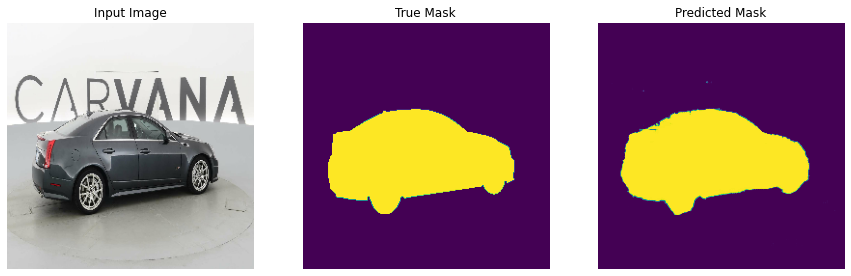

Epoch 12/18
238/238 [==============================] - 53s 224ms/step - loss: 0.0170 - dice_coef: 0.9830 - binary_accuracy: 0.9930 - val_loss: 0.0181 - val_dice_coef: 0.9820 - val_binary_accuracy: 0.9926
Epoch 13/18
1/1 [==============================] - 0s 21ms/step


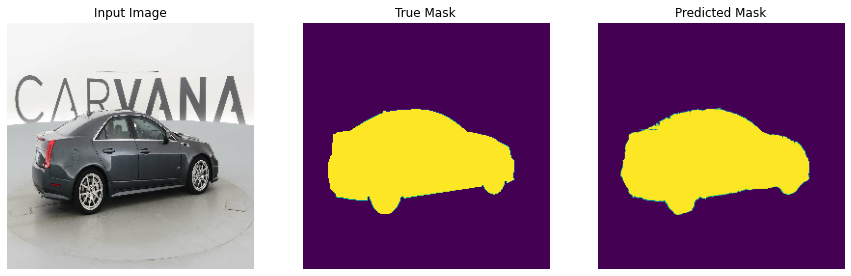

Epoch 14/18
238/238 [==============================] - 53s 225ms/step - loss: 0.0168 - dice_coef: 0.9832 - binary_accuracy: 0.9931 - val_loss: 0.0189 - val_dice_coef: 0.9811 - val_binary_accuracy: 0.9922
Epoch 15/18
1/1 [==============================] - 0s 23ms/step


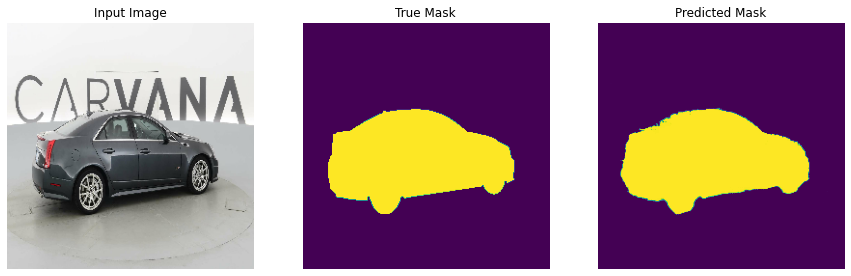

Epoch 16/18
238/238 [==============================] - 53s 224ms/step - loss: 0.0164 - dice_coef: 0.9836 - binary_accuracy: 0.9932 - val_loss: 0.0175 - val_dice_coef: 0.9825 - val_binary_accuracy: 0.9927
Epoch 17/18
1/1 [==============================] - 0s 20ms/step


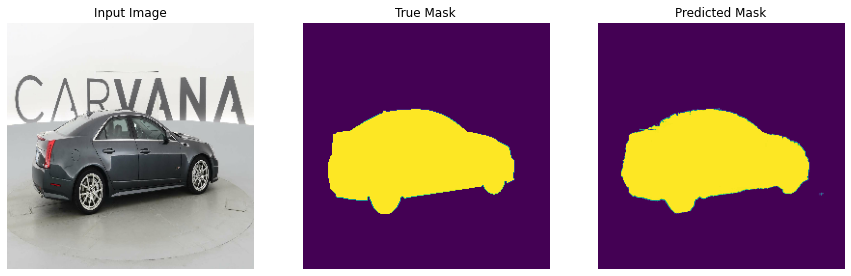

Epoch 18/18
238/238 [==============================] - 53s 224ms/step - loss: 0.0163 - dice_coef: 0.9837 - binary_accuracy: 0.9932 - val_loss: 0.0180 - val_dice_coef: 0.9821 - val_binary_accuracy: 0.9925


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 2 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 18
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])